# 한국복지패널 데이터 분석
- 한국보건사회연구원에서 우리나라 가구의 경제활동을 연구한 데이터
- 전국 7,000여 가구를 선정하여 2006년 부터 매년 추적 조사한 자료
- 경제활동, 생활실태, 복지욕구 등 천여개 변수로 구성됨
- 통계 패키지 SPSS 전용 파일

### Lab 1: 데이터 분석 준비하기
1. 데이터 준비
- Koweps_hpwc14_2019_beta2.sav
- 2020년 발간된 복지패널 데이터, 6331가구, 14,418명 정보를 담고 있음
2. 패키지 설치 및 로드
- 데이터 파일은 통계 분석 패키지인 SPSS 전용 파일
- pyreadstat 패키지 설치하면 SPSS, SAS, STATA등 다양한 통계 분석 소프트웨어 데이터 파일을 불러올 수 있음
- pip install pyreadstat

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#pyreadstat 패키지 설치
# !pip install pyreadstat

# pyreadstat 패키지의 설치 정보 확인
!pip show pyreadstat

Name: pyreadstat
Version: 1.2.4
Summary: Reads and Writes SAS, SPSS and Stata files into/from pandas data frames.
Home-page: https://github.com/Roche/pyreadstat
Author: Otto Fajardo
Author-email: pleasecontactviagithub@notvalid.com
License: Apache License Version 2.0
Location: D:\anaconda3\Lib\site-packages
Requires: pandas
Required-by: 


3. 데이터 불러오기
- pd.read_spss()로 데이터 불러오기
- df.copy()로 복사본을 만들어 분석에 활용한다.

In [3]:
# SPSS 통계 패키지 전용 파일 데이터 불러오기
# SPSS(Statistical Package for the Social Sciences)는 사회 과학용 통계 패키지로
# IBM
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
#데이터 분석 작업용 복사본 만들기
welfare = raw_welfare.copy()

4. 데이터 검토하기
- 데이터의 특성을 살펴보기
- 행, 열 개수
- 변수 속성
- 요약 통계량

In [4]:
# 데이터 구조 특징 살펴보기
# 변수의 수가 많고 변수명이 코드로 되어 있어서 전체 구조 파악이 힘들다.
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [5]:
# 행과 열 개수 출력
welfare.shape

(14418, 830)

In [6]:
# 요약 통계량
welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


5. 변수명 바꾸기
- 복지데이터와 같은 대규모 데이터는 변수의 수가 많고 변수명이 코드로 되어 있다.
- 규모가 큰 조사 자료의 경우 데이터 특징을 설명한 코드북을 함께 제공한다.
- 코드북에는 변수명과 값의 의미가 설명되어 있다. (코드북을 통해 데이터 특징과 분석 방향 아이디어 도출)
- 복지 데이터 코드북 일부 : Koweps_Codebook_2019.xlsx
- 7개 변수를 선정하여 분석한다.
    - 1단계 : 변수 검토 및 전처리 - 변수 특징을 파악하고, 이상치와 결측치 정제
    - 2단계 : 변수 간 관계 분석 - 데이터 요약 표와 특징을 알 수 있는 그래프를 만들고 해석한다

In [7]:
# 코드북을 참조하여 분석에 사용할 7개 변수명을 알기쉬운 단어로 변경
welfare = welfare.rename(
columns = {
    'h14_g3':'sex', # 성별
    'h14_g4':'birth', # 태어난 연도
    'h14_g10':'marriage_type', # 혼인 상태
    'h14_g11':'religion', # 종교
    'p1402_8aq1':'income', # 일한달의 월 평균 임금
    'h14_eco9':'code_job', # 직종
    'h14_reg7':'code_region' # 7개 권역별 지역 구분
})

In [8]:
# 바뀐 변수명으로 데이터 확인
welfare[['sex','birth','marriage_type','religion','income','code_job','code_region']].head()

,sex,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0


## 성별에 따른 월급 차이 - 성별에 따라 월급에 차이가 있을까?
### Lab 2: 성별 변수 검토 및 전처리하기

1. 변수 검토하기

In [9]:
# 성별로 몇명이 있는지 확인
# 성별 변수의 데이터 타입 확인
welfare['sex'].dtypes

dtype('float64')

In [10]:
type(welfare['sex'])

pandas.core.series.Series

In [11]:
#성별 분류별 빈도 수 구하기 (성별은 1, 2로 구성)
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

- 성별 값에 대한 코드북 확인
- 여자 7913명, 남자 6505명
- 모름/무응답(9) 값은 없는 것으로 확인된다.
- 남자 1, 여자 2, 모름/무응답 9

2. 전처리 하기
- 남자(1), 여자(2) 값 이외에 모름/무응답(9)이나 기타 이상차가 있는 경우 결측 처리
- sex 변수의 값 1, 2에 대해 값의 의미를 알기 쉽도록 'male','female'로 변경

In [12]:
#이상치에 대한 결측치 처리
welfare['sex'] = np.where(welfare['sex']==9,np.nan,welfare['sex'])
#결측치 확인
welfare['sex'].isna().sum()

0

In [13]:
#성별 항목 이름 부여
welfare['sex']=np.where(welfare['sex']==1,'male','female')
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

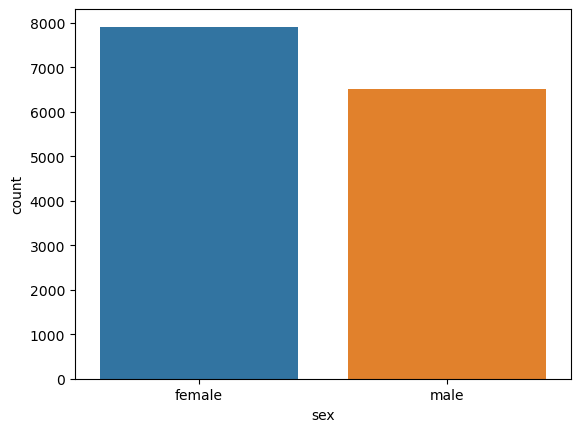

In [14]:
#성별 빈도수에 따른 막대 그래프 그리기
sns.countplot(data=welfare,x='sex')

#### countplot을 사용하지 않고, barplot을 사용해서 그리려면?

In [15]:
result = welfare.groupby('sex',as_index=False).agg(n=('sex','count'))
result

,sex,n
0,female,7913
1,male,6505


<Axes: xlabel='sex', ylabel='n'>

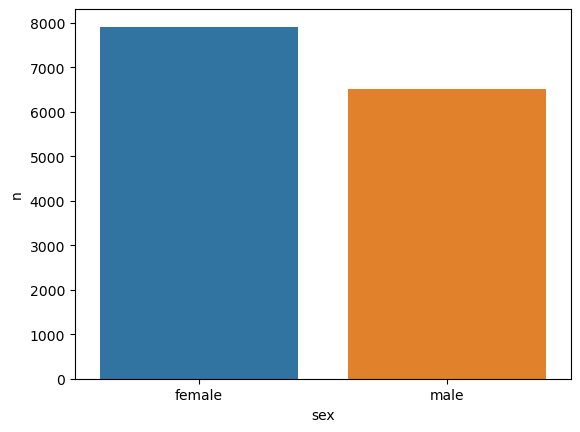

In [16]:
sns.barplot(result,x='sex',y='n')

### Lab 3: 월급 변수 검토 및 전처리하기
1. 변수 검토하기
- 코드북: 월급은 '일한 달의 월 평균 임금'으로 1만원 단위 기록
월급은 연속 변수로 그룹별 빈도수(df.value_counts())로 파악하기 어려움
연속 변수는 df.describe()로 요약 통계량으로 파악하는 것이 바람직

In [17]:
#월급 변수의 데이터 타입 확인
welfare['income'].dtypes

dtype('float64')

In [18]:
#월급의 요약 통계량 구하기
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

월급 요약 통계량 분석
- 0~1892만원 분포
- 150만원 ~ 345만원에 가장 많이 분포
- 평균 값은 268.445만원
- 중앙 값은 220만원(전반적으로 낮은 값 쪽으로 치우쳐 있음)

<Axes: xlabel='income', ylabel='Count'>

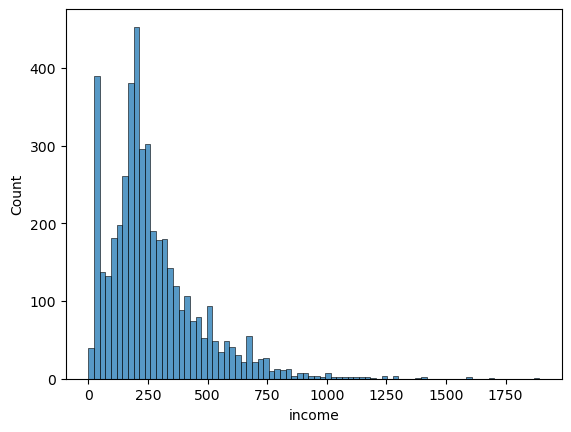

In [19]:
# 월급 분포를 히스토그램으로 확인
sns.histplot(data=welfare,x='income')

<Axes: xlabel='income', ylabel='Count'>

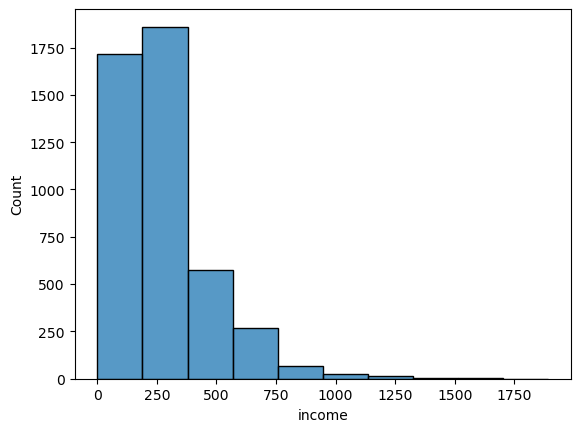

In [20]:
sns.histplot(data=welfare,x='income',bins=10)

0~250만원 대에 가장 많은 사람이 분포하고, 그 뒤로 점차 빈도가 감소

2. 전처리 하기
- 코드북을 보면, 원급은 만원 단위로 되어 있고
- 모름/무응답은 9999로 코딩됨

        - 이상치나 결측치 확인
            - 월급의 값이 9999인 경우, 이상치로 판단하여 결측 처리
            - 결측치 확인

In [21]:
# 이상치 확인
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [22]:
welfare['income'].head()

0      NaN
1      NaN
2    107.0
3    192.0
4      NaN
Name: income, dtype: float64

- 이상치 확인: 월급 최대치가 1892만원.
- 모름/무응답 (9999)는 없는 것으로 확인

In [23]:
# 결측치 확인
# 직업이 없어서 월급을 받지 못하는 응답자
welfare['income'].isna().sum()

9884

In [24]:
# 이상치(9999) 결측 처리
welfare['income'] = np.where(welfare['income']==9999,np.nan,welfare['income'])

In [25]:
# 결측치 제거
# welfare.dropna(subset=['income'])['income'].isna().sum()